In [2]:
import pathlib
import tensorflow as tf
import PIL.Image

data_dir = r'D:\Study\Magistr\AI\archive\archive\flowers'

batch_size = 32
img_height = 150
img_weight = 150

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 3,
    image_size = (img_height, img_weight),
    batch_size = batch_size
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 3,
    image_size = (img_height, img_weight),
    batch_size = batch_size
)
class_names = train_ds.class_names
print (class_names)
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



Found 4317 files belonging to 5 classes.
Using 863 files for validation.
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
(32, 150, 150, 3)
(32,)


In [4]:
num_classes = 5
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = 5

model = Sequential([
    layers.Rescaling(1./255, input_shape = (img_height, img_weight, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(num_classes)
])


In [5]:
model.compile(
    optimizer = 'adam', 
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics = ['accuracy'] )
model.fit(
train_ds,
validation_data=val_ds,
epochs=10)

Epoch 1/10
108/108 [==============================] - 58s 513ms/step - loss: 1.3208 - accuracy: 0.4296 - val_loss: 1.1059 - val_accuracy: 0.5481
Epoch 2/10
108/108 [==============================] - 49s 458ms/step - loss: 0.9959 - accuracy: 0.6002 - val_loss: 0.9791 - val_accuracy: 0.6095
Epoch 3/10
108/108 [==============================] - 47s 440ms/step - loss: 0.8024 - accuracy: 0.6934 - val_loss: 1.0080 - val_accuracy: 0.6304
Epoch 4/10
108/108 [==============================] - 50s 459ms/step - loss: 0.6146 - accuracy: 0.7721 - val_loss: 1.1905 - val_accuracy: 0.6025
Epoch 5/10
108/108 [==============================] - 47s 435ms/step - loss: 0.4433 - accuracy: 0.8431 - val_loss: 1.3715 - val_accuracy: 0.5829
Epoch 6/10
108/108 [==============================] - 45s 416ms/step - loss: 0.3309 - accuracy: 0.8804 - val_loss: 1.4468 - val_accuracy: 0.6211
Epoch 7/10
108/108 [==============================] - 45s 414ms/step - loss: 0.2618 - accuracy: 0.9068 - val_loss: 1.7480 - val_ac

In [13]:
from PIL import Image

image = Image.open(r'C:\Users\lisya\Downloads\sf.jpg')
image.load()
image.show()
import numpy as np

image = image.resize((150, 150))
image_tensor = tf.convert_to_tensor(np.array(image), dtype = tf.float32)
image_tensor = tf.expand_dims(image_tensor, 0)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(image_tensor, use_multiprocessing=True)
predictions[0]
print("{} with a {:.2f} percent"
      .format(class_names[np.argmax(predictions[0])], 100* np.max(predictions[0]))
     )

1/1 [==============================] - 0s 120ms/step
sunflower with a 99.99 percent


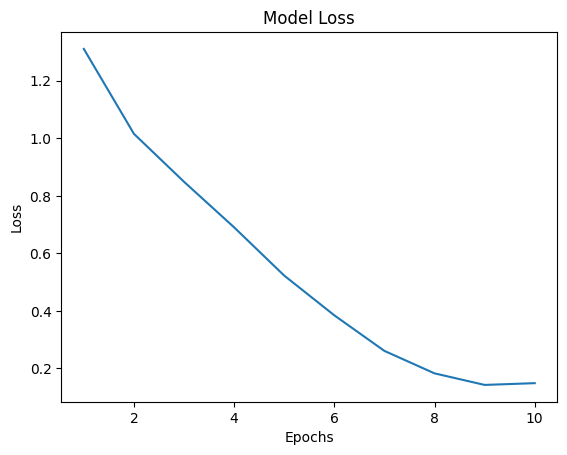

In [6]:
from matplotlib import pyplot as plt
y = [1.3106,1.0155, 0.8488, 0.6904, 0.5227, 0.3846, 0.2609, 0.1829, 0.1427, 0.1488 ]
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

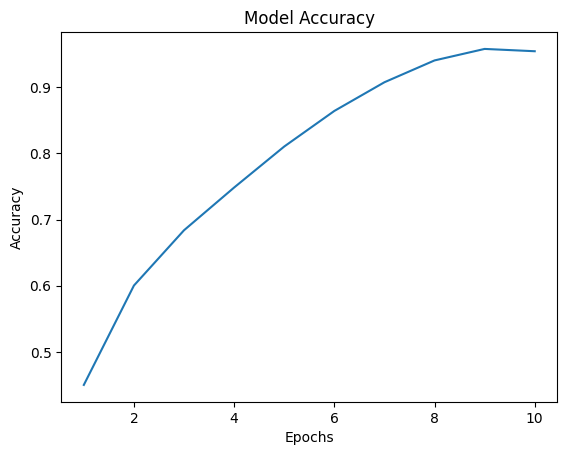

In [7]:
from matplotlib import pyplot as plt
y = [0.4499,  0.6002, 0.6838, 0.7484, 0.8104, 0.8642, 0.9076, 0.9406, 0.9580, 0.9545 ]
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()